In [3]:
import pandas as pd
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2,3,6,4]
df = pd.DataFrame(data = {'course_name' : course_name, 'duration' : duration})

In [4]:
df

,course_name,duration
0,Data Science,2
1,Machine Learning,3
2,Big Data,6
3,Data Engineer,4


# 1

In [6]:
df.iloc[1]

course_name    Machine Learning
duration                      3
Name: 1, dtype: object

# 2

In [ ]:
'''
In Pandas, both loc and iloc are used to index and select data from a DataFrame, but they differ in how they identify and select the data.

loc selects rows and columns based on their labels (names).
iloc selects rows and columns based on their integer positions (indexes).
More specifically, loc requires that you pass in the label of the rows and columns you want to select as arguments,
while iloc requires that you pass in their integer position. 
'''

# 3

In [7]:
re_index = [3,0,1,2]
new_df = df.reindex(re_index)
new_df

,course_name,duration
3,Data Engineer,4
0,Data Science,2
1,Machine Learning,3
2,Big Data,6


In [8]:
new_df.loc[2]  

course_name    Big Data
duration              6
Name: 2, dtype: object

In [9]:
new_df.iloc[2]

course_name    Machine Learning
duration                      3
Name: 1, dtype: object

In [ ]:
'''
the rows order is changes , since we reassigned the indexed
'''

# new code for further questions

In [10]:
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)

In [11]:
df1

,column_1,column_2,column_3,column_4,column_5,column_6
1,0.055973,0.160190,0.348088,0.742975,0.691448,0.206250
2,0.244945,0.187906,0.141157,0.700442,0.242679,0.268791
3,0.133901,0.752579,0.639144,0.454914,0.186010,0.314908
4,0.266760,0.581849,0.507381,0.088809,0.406871,0.314565
5,0.693706,0.662498,0.964808,0.002028,0.420110,0.820210
6,0.188388,0.262943,0.031248,0.431154,0.854086,0.372927


# 4

In [17]:
df1.mean(axis=0)

column_1    0.263945
column_2    0.434661
column_3    0.438638
column_4    0.403387
column_5    0.466867
column_6    0.382942
dtype: float64

In [21]:
df1['column_2'].std()

0.26090427186958487

# 5

In [24]:
df1.loc[2, 'column_2'] = 'ok'

In [28]:
try:
    df1['column_2'].mean()
except TypeError:
    print('string is between the values in clumn 2 which i inserted in last question, only int object can b used in mean()')

string is between the values in clumn 2 which i inserted in last question, only int object can b used in mean()


# 6

In [ ]:
'''
In Pandas, the term "window function" refers to a group of functions that operate on a rolling or expanding window of
data in a DataFrame or Series. These functions can be useful for calculating movig statistics, smoothing out noisy data,
and detecting trends or patterns in time-series data.

Rolling window functions: These functions operate on a sliding window of a fixed size and perform calculations on 
the data within the window. The window size can be specified using the window parameter. Examples of rolling window
functions include rolling.mean(), rolling.sum(), and rolling.std(), among others.'''

# 7

In [36]:
now = pd.to_datetime('now')
df = pd.DataFrame({'date': [now]})
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
print(df[['month', 'year']])


      month  year
0  February  2023


/tmp/ipykernel_70/2330655833.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')


# or we can do this , since above one will be depreciated soon

In [40]:
import datetime
now = datetime.datetime.now()

In [46]:
now.month

2

In [42]:
now.year

2023

# 8

In [50]:

date1_str = input("Enter the first date (YYYY-MM-DD): ")
date1 = pd.to_datetime(date1_str)

date2_str = input("Enter the second date (YYYY-MM-DD): ")
date2 = pd.to_datetime(date2_str)

time_diff = date2 - date1
days = time_diff.days
hours = time_diff.seconds // 3600
minutes = (time_diff.seconds // 60) % 60

# Display the result
print("Time difference: {} days, {} hours, {} minutes".format(days, hours, minutes))


Enter the first date (YYYY-MM-DD):  2023-02-25
Enter the second date (YYYY-MM-DD):  2023-02-28


Time difference: 3 days, 0 hours, 0 minutes


# 9

In [64]:
import pandas as pd

# Prompt the user to enter the file path
file_path = input("Enter the file path: ")

# Prompt the user to enter the column name to be converted
column_name = input("Enter the column name to be converted: ")

# Prompt the user to enter the category order
category_order = input("Enter the category order (comma-separated): ")

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert the specified column to a categorical data type with the specified order
categories = category_order.split(",")
cat_dtype = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
df[column_name] = df[column_name].astype(cat_dtype)

# Sort the data by the specified column
sorted_data = df.sort_values(by=column_name)

# Display the sorted data
print(sorted_data)


Enter the file path:  25feb_data.csv
Enter the column name to be converted:  Color
Enter the category order (comma-separated):  Purple,Orange,Red,Yellow


     Name   Color    Size
2   Grape  Purple   Small
3  Orange  Orange  Medium
0   Apple     Red   Small
1  Banana  Yellow  Medium


# 10

In [66]:

import matplotlib.pyplot as plt

# Prompt the user to enter the file path
file_path = input("Enter the file path: ")

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert the "Date" column to a datetime data type
df["Date"] = pd.to_datetime(df["Date"])

# Group the data by "Date" and "Product Category" and sum the "Sales" column
sales_by_date_category = df.groupby(["Date", "Product Category"])["Sales"].sum().unstack()

Enter the file path:  25feb_data2.csv


In [67]:
sales_by_date_category

Product Category,Clothing,Electronics
Date,,
2022-01-01,500,1000
2022-01-02,600,1200
2022-01-03,700,1300


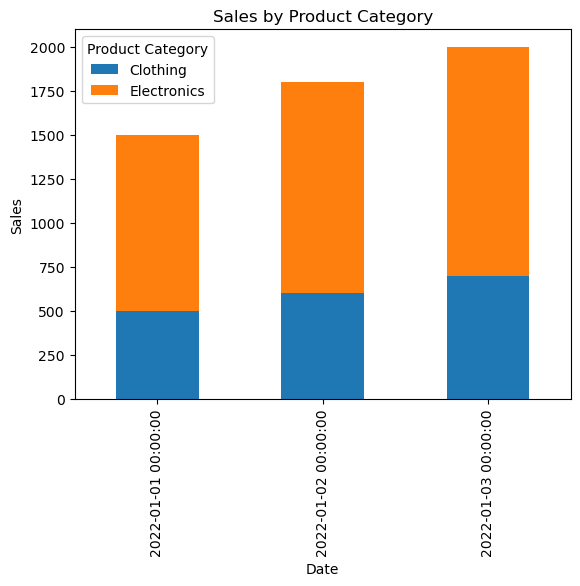

In [68]:
sales_by_date_category.plot(kind="bar", stacked=True)

# Set the title and axis labels
plt.title("Sales by Product Category")
plt.xlabel("Date")
plt.ylabel("Sales")

# Show the chart
plt.show()


# 11

In [70]:

# Prompt the user to enter the file path of the CSV file containing the student data
file_path = input("Enter the file path of the CSV file containing the student data: ")

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Calculate the mean, median, and mode of the test scores
mean_score = df['Test Score'].mean()
median_score = df['Test Score'].median()
mode_scores = df['Test Score'].mode()

# Display the mean, median, and mode in a table
table = pd.DataFrame({'Statistic': ['Mean', 'Median', 'Mode'], 'Value': [mean_score, median_score, mode_scores]})
table


Enter the file path of the CSV file containing the student data:  25feb_data3.csv


,Statistic,Value
0,Mean,83.5
1,Median,85.0
2,Mode,"0 85 Name: Test Score, dtype: int64"
